<a href="https://colab.research.google.com/github/alura-es-cursos/Inmersion-en-Datos-con-Python/blob/aula02/credito_banco_aleman_inmersion_Dia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# INMERSION DE DATOS CON PYTHON

#**PROBLEMA DE NEGOCIO**


---

La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

#**1. Configuración del Ambiente**


---

In [1]:
# prompt: # prompt: importa los siguientes módulos con sus respectivos alias:
# pandas, matplotlib, seaborn, drive de google colab, warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive # sirve para conectar mi cuenta de drive con el archivo colab
import warnings # ahorrarnos adevertencias en la conección de drive

# conectar drive con colab
drive.mount('/content/Drive')
warnings.filterwarnings('ignore')

Mounted at /content/Drive


#**2. Preprocesamiento de Datos**


---

In [2]:
# la función set_option del módulo pandas para configurar el número máximo de columnas que se mostrarán al imprimir un DataFrame.
# este caso, pd.set_option('display.max_columns', None) establece que se mostrarán todas las columnas del DataFrame cuando se imprima,
# sin limitar el número máximo de columnas que se mostrarán.

pd.set_option('display.max_columns', None)
global df_banco, resultados

In [3]:
df_banco = pd.read_csv('/content/Drive/MyDrive/Data_Science/Inmersión de datos Alura/german_credit.csv')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
# muestra la forma del dataframe, su cantidad de filas y columnas
df_banco.shape

(1000, 21)

In [5]:
# muestra las columnas del dataframe
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [6]:
# muestra la informacion del dataframe
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [7]:
# permite agrupar y contar los valores repetidos de la columna mencionada o elejida
df_banco.account_check_status.value_counts()

no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: account_check_status, dtype: int64

In [8]:
# devuelve un objeto de los indices de la columna
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object')

In [9]:
#  el método select_dtypes de un DataFrame de pandas (df_banco)
#  para seleccionar las columnas que contienen tipos de datos de objeto (es decir,
#  cadenas de texto u otros objetos no numéricos).

columnas = list(df_banco.select_dtypes(include=['object']).columns)
columnas

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

In [10]:
# con este ciclo for obteneos el nombre de cada columna tipo object,
# ademas obtenemos el index de cada una de esas columnas
for columna in columnas:
    print(f'El nombre de la columna: {columna}')
    print(list(df_banco[(f'{columna}')].value_counts().index))
    print('\n')

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna: personal_status_sex
['male : single', 'femal

In [11]:
# creamos un diccionario dic con los index de la columna foreign_worker y
# les asignamos un nuevo valor a los index
dic = {
    'yes': 1,
    'no': 2
}

# con esta linea de codigo remplazamos los index originales de la columna foreign_worker
# por los valore del dicionario dic
df_banco.foreign_worker = df_banco.foreign_worker.map(dic)
df_banco['foreign_worker']

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: foreign_worker, Length: 1000, dtype: int64

In [12]:
df_banco['foreign_worker'].value_counts()

1    963
2     37
Name: foreign_worker, dtype: int64

In [13]:
# esta funcion nos ayuda a reescribir todos los index tipo objeto con los diccionarios creados
def procesar_datos():
  global df_banco

  # se eliminan campos duplicados y null, en caso de que no existan estos campos
  # se devulve es mismo dataFrame ya creado.
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

#   a = {'yes' : 1,
#       'no' : 0
#   }
#   df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [14]:
procesar_datos()
df_banco.sample(3) # muestra 3 datos aleatorios del dataset

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
367,0,1,18,3,4,3650,5,4,1,2,1,4,3,22,3,1,1,3,1,0,1
646,0,1,30,1,4,4583,5,3,2,1,3,2,1,32,3,2,2,3,1,0,1
927,1,1,48,3,2,10297,5,2,4,3,1,4,4,39,2,3,3,3,2,1,1


#**3. Exploración de Datos**


---

In [15]:
#  las variables discretas son aquellas que toman un número finito
#  o contablemente infinito de valores distintos. Esto significa que
#  los valores que puede tomar la variable son distintos e individuales,
#  sin posibilidad de valores intermedios.

# discrito quiere decir que se establecera un rango
variables_discretas = ['personal_status_sex','age',
                       'duration_in_month','credit_amount','default']
df_banco[variables_discretas].tail(3)

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


en nuestro DataFrame la columna 	personal_status_sex	tien datos mesclados.

**'male : divorced/separated' : 1,**

**'female : divorced/separated/married' : 2,**

**'male : single' : 3,**

**'male : married/widowed' : 4,**

**'female : single' : 5**

los cuales son: estado civil de la persona y el genero. Por lo cual deven dividirse, separarce.

In [16]:
# {'male : divorced/separated' : 1,
#       'female : divorced/separated/married' : 2,
#       'male : single' : 3,
#       'male : married/widowed' : 4,
#       'female : single' : 5
# }
# reducimos nuestros campos a hombre 0 y mujer 1 y asignamos sus respectivas
# caracteristicas, se crea una nueva columna (sexo) donde se mostrara
# este nuevo valor
# dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
# df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)


In [17]:
# esta funcion re organizar los index/valores de las variables discretas
# creando nuevas columnas organizando sus valores por rangos, para una
# mejor visualizacion.
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [18]:
feature_engineering()
df_banco.head(3)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3


In [19]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,1.037000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,2.000000,1.000000,1.00000,6.000000,6.000000,19.000000


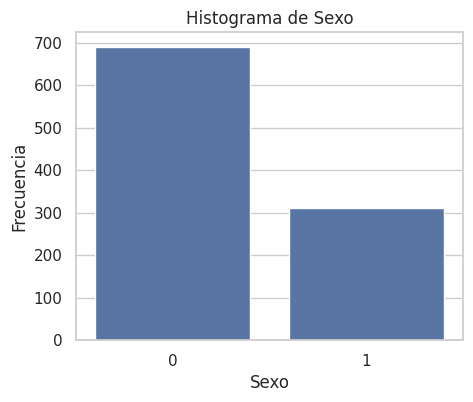

In [20]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el histograma utilizando Seaborn
plt.figure(figsize=(5, 4))
sns.countplot(data=df_banco, x='sexo')
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

In [21]:
# esta funcion permite graficar las columnas de lista histogramas
def analisis_exploratorio():
  global df_banco
  histogramas = ['sexo','estado_civil','rango_plazos_credito',
                 'rango_edad','default']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

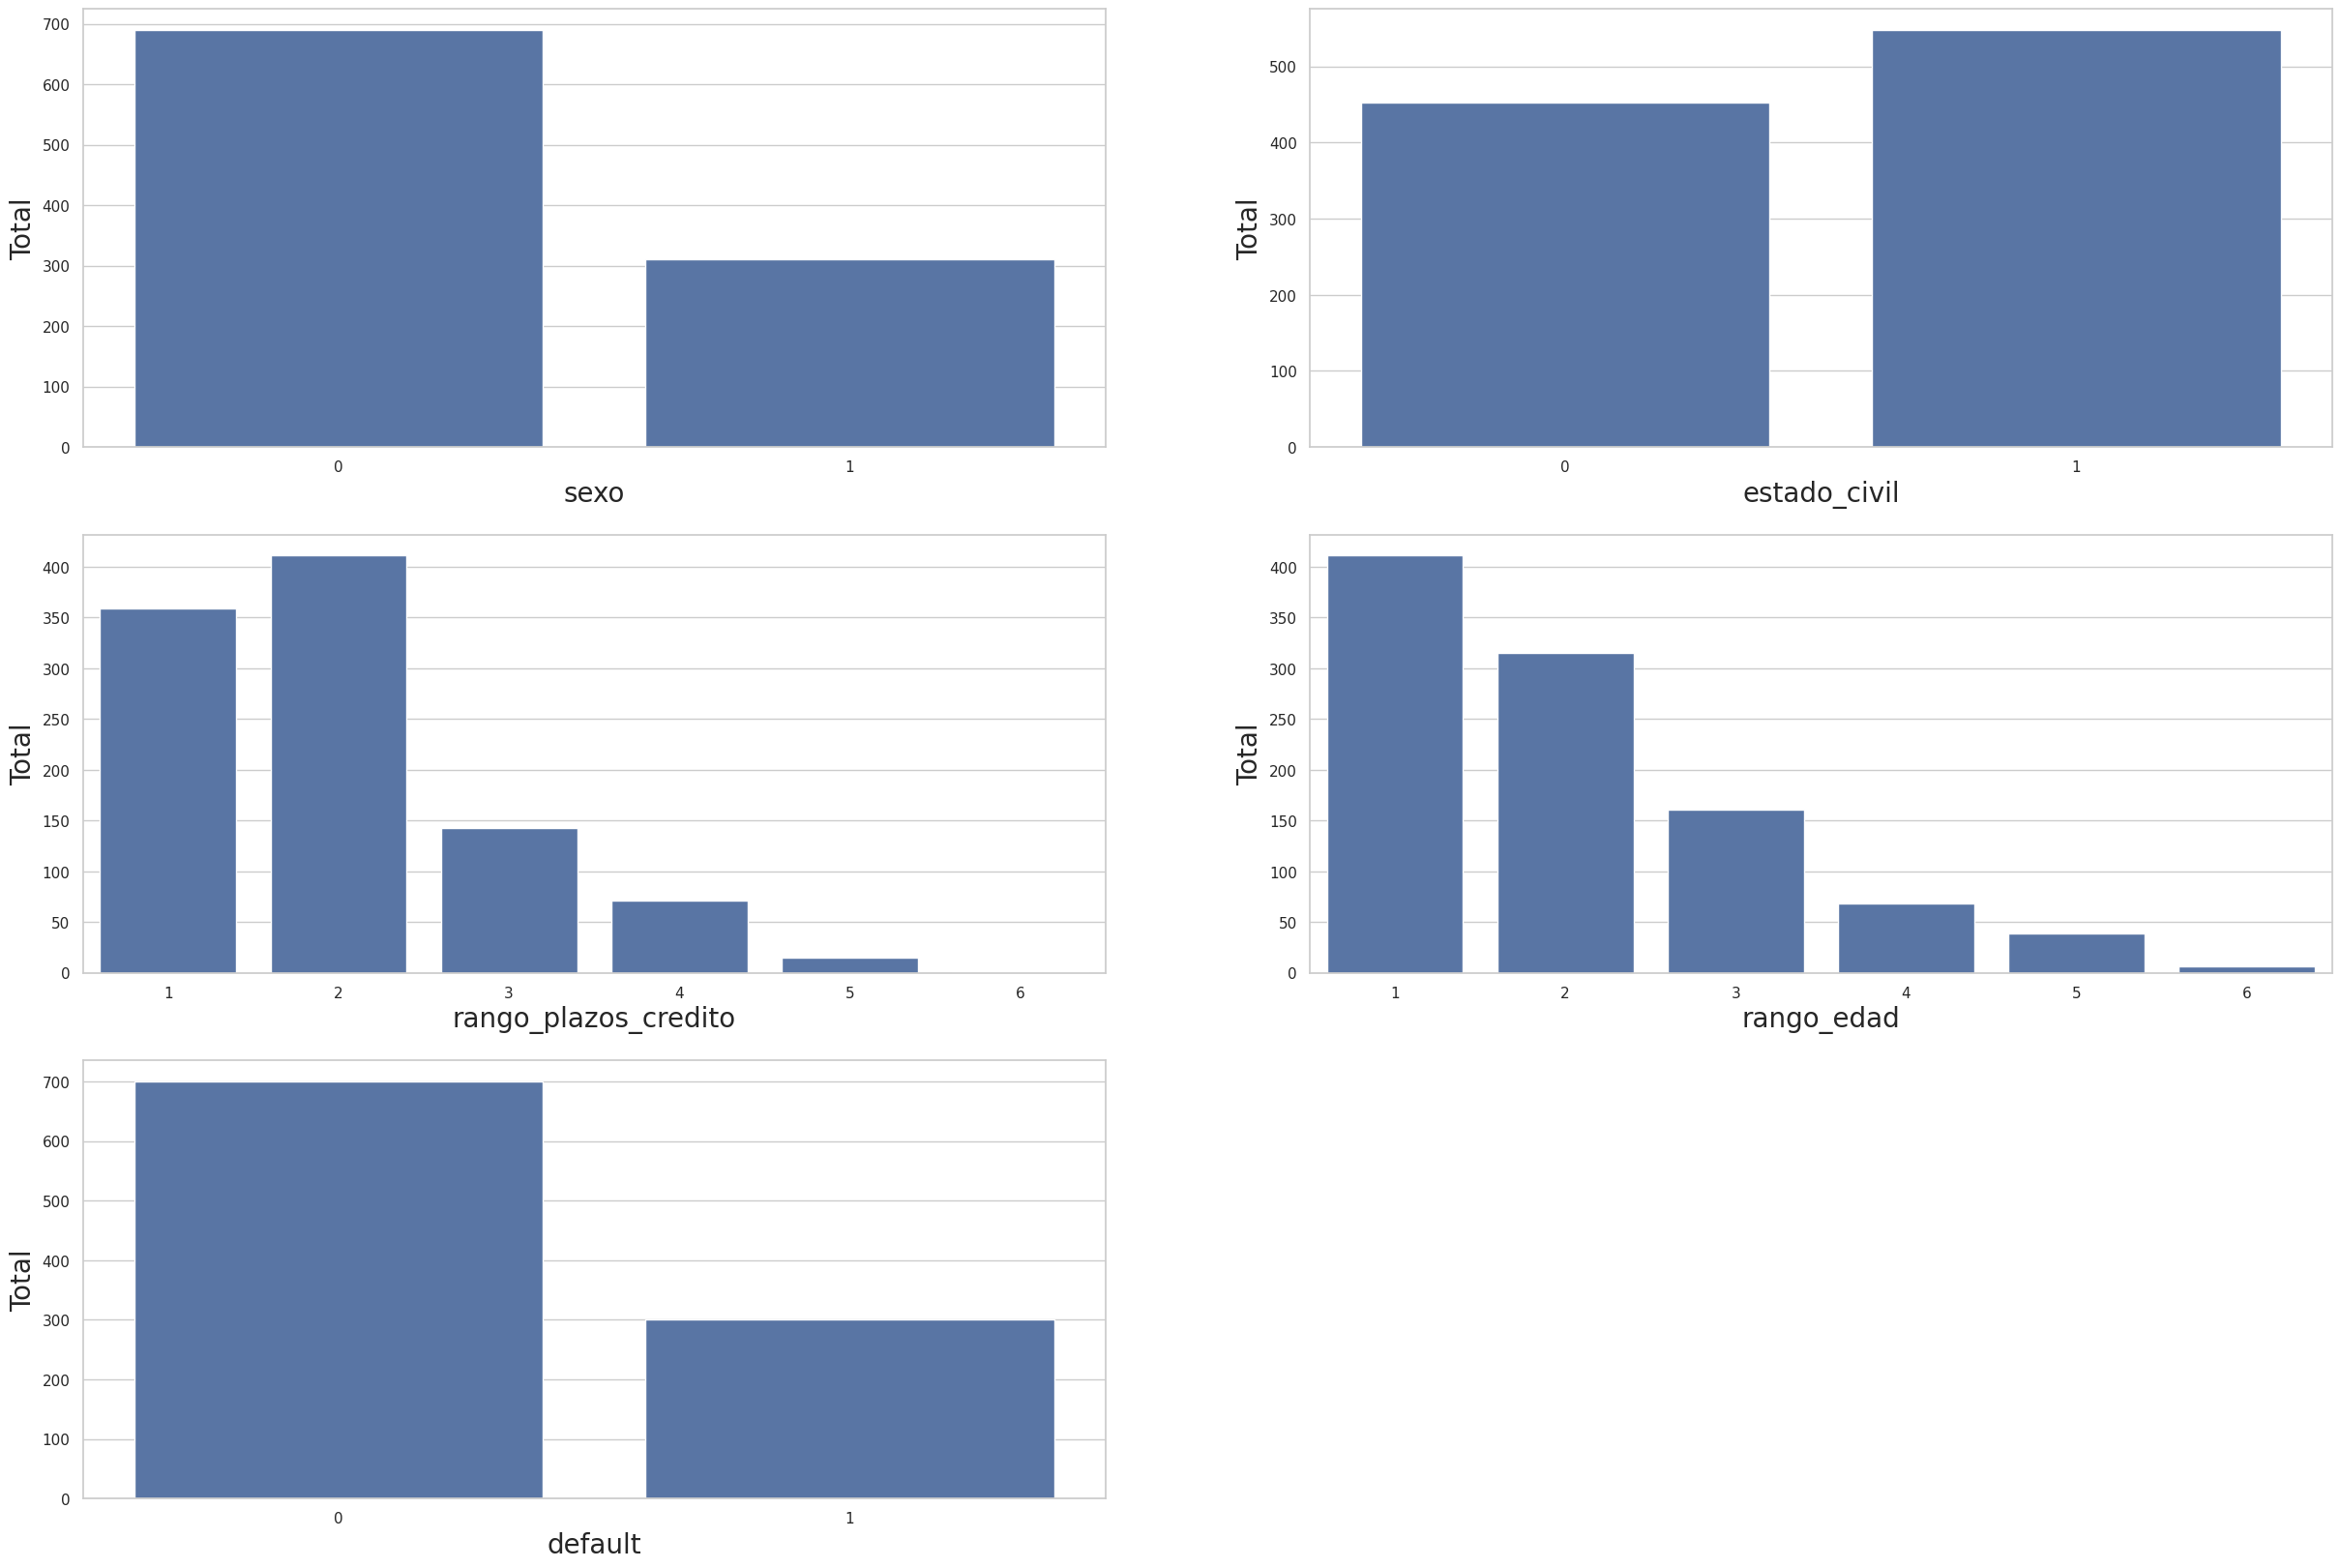

In [22]:
analisis_exploratorio()

**Desafíos**


1.   Analizar los datos de las
distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.
2.   Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.
3. Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones, porque es una habilidad esencial.



Histograma sexo: Hay un poco más del doble de hombres que de mujeres en los datos que se nos entregó.





In [23]:
df_banco.sexo.value_counts()

0    690
1    310
Name: sexo, dtype: int64

Histograma estado_civil: Hay más personas solteras que casadas o con algún compromiso.

Histograma rango_plazos_credito: Los rangos de préstamo de crédito más comunes no superan los 36 meses (rango 3), siendo el más común de 12 a 24 meses (rango 2), seguido por un plazo de 1 a 12 meses(rango 1) y el menos común de 60 a 72 meses (rango 4 a 6)

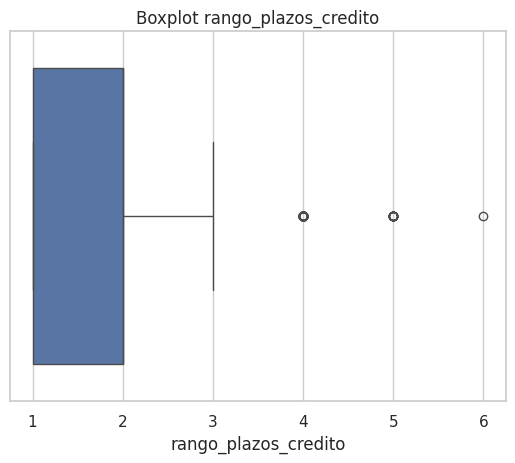

In [24]:
sns.boxplot(x=df_banco['rango_plazos_credito'])
plt.title('Boxplot rango_plazos_credito')
plt.xlabel('rango_plazos_credito')
plt.show()

Histograma rango_edad: hay más personas menores de 40 años en los datos del banco. más del 50% de las personas son menores de 40 años.
Apeasr de que hay muy pocas personas mayores, con edades muy avansadas o que superan la media de vida estandar, yo creo que es de importancia considerarlas para el modelo.





In [25]:
print(df_banco['rango_edad'].describe())

count    1000.000000
mean        2.027000
std         1.136469
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rango_edad, dtype: float64


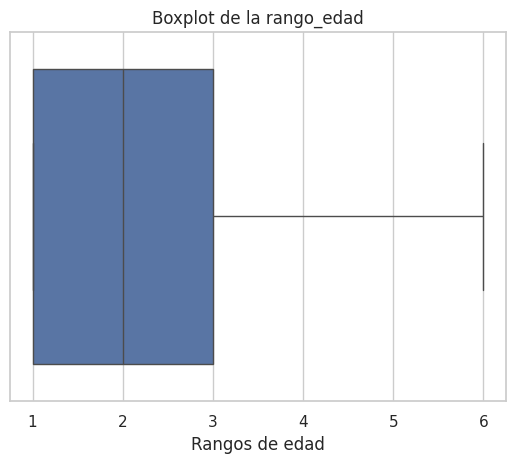

In [26]:
sns.boxplot(x=df_banco['rango_edad'])
plt.title('Boxplot de la rango_edad')
plt.xlabel('Rangos de edad')
plt.show()

Histograma default: un aproximado del 30% de las personas en los datos del banco incumplen con el pago de crédito, ademas de eso, nuestra variable objetivo esta desvalanceada esto puede afectar la decicion del modelo

In [27]:
df_banco.default.value_counts()

0    700
1    300
Name: default, dtype: int64

***Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.*** (nota)

no hay un valor específico que garantice que las distribuciones de tus datos son "correctas". La corrección de las distribuciones depende del contexto y del problema que estés abordando. Sin embargo, hay algunas técnicas y herramientas que puedes utilizar para evaluar si las distribuciones son adecuadas para tu análisis:

Visualización de distribuciones: Utiliza gráficos como histogramas, boxplots o gráficos de densidad para visualizar la distribución de tus datos. Observa si la forma de la distribución se ajusta a lo que esperas en función del conocimiento del dominio o la teoría detrás de los datos.

Pruebas estadísticas: Puedes utilizar pruebas estadísticas como la prueba de normalidad (por ejemplo, la prueba de Shapiro-Wilk o la prueba de Kolmogorov-Smirnov) para evaluar si tus datos siguen una distribución normal. Sin embargo, es importante tener en cuenta que estas pruebas pueden ser sensibles al tamaño de la muestra.

Comparación con distribuciones teóricas: Puedes comparar la distribución de tus datos con distribuciones teóricas conocidas (como la distribución normal, la distribución uniforme, etc.) utilizando gráficos de probabilidad como el gráfico Q-Q (cuantil-cuantil).

Análisis de residuos: Si estás ajustando un modelo estadístico, puedes analizar los residuos del modelo para verificar si siguen una distribución adecuada (por ejemplo, si los residuos son aproximadamente normales y homocedásticos en un modelo de regresión lineal).

En resumen, no hay un valor único que garantice la corrección de las distribuciones de tus datos. Es importante utilizar una combinación de técnicas y herramientas para evaluar si las distribuciones son adecuadas para tu análisis y si cumplen con las suposiciones de los métodos estadísticos que estás utilizando.


***Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.***

Un mapa de calor es una visualización que se utiliza para representar la correlación entre las variables en un conjunto de datos mediante colores. Es una forma efectiva de identificar patrones de correlación entre múltiples variables de manera rápida y visualmente intuitiva. Los valores de correlación se representan en una escala de colores, donde los valores altos de correlación suelen mostrarse en colores más claros (como el amarillo o el blanco) y los valores bajos de correlación en colores más oscuros (como el azul o el negro).

In [28]:
# Calcula la matriz de correlación:
correlation_matrix = df_banco.corr()
print(correlation_matrix)

                             default  account_check_status  credit_history  \
default                     1.000000             -0.350847       -0.228785   
account_check_status       -0.350847              1.000000        0.192191   
credit_history             -0.228785              0.192191        1.000000   
purpose                     0.001514              0.053223       -0.081634   
savings                     0.178943             -0.222867       -0.039058   
present_emp_since           0.116002             -0.106339       -0.138225   
installment_as_income_perc  0.072404             -0.005280        0.044375   
other_debtors              -0.025137             -0.127737       -0.040676   
present_res_since           0.002967             -0.042234        0.063198   
property                    0.142612             -0.032260       -0.053777   
other_installment_plans    -0.109844              0.046841        0.121973   
housing                    -0.019315              0.022424      

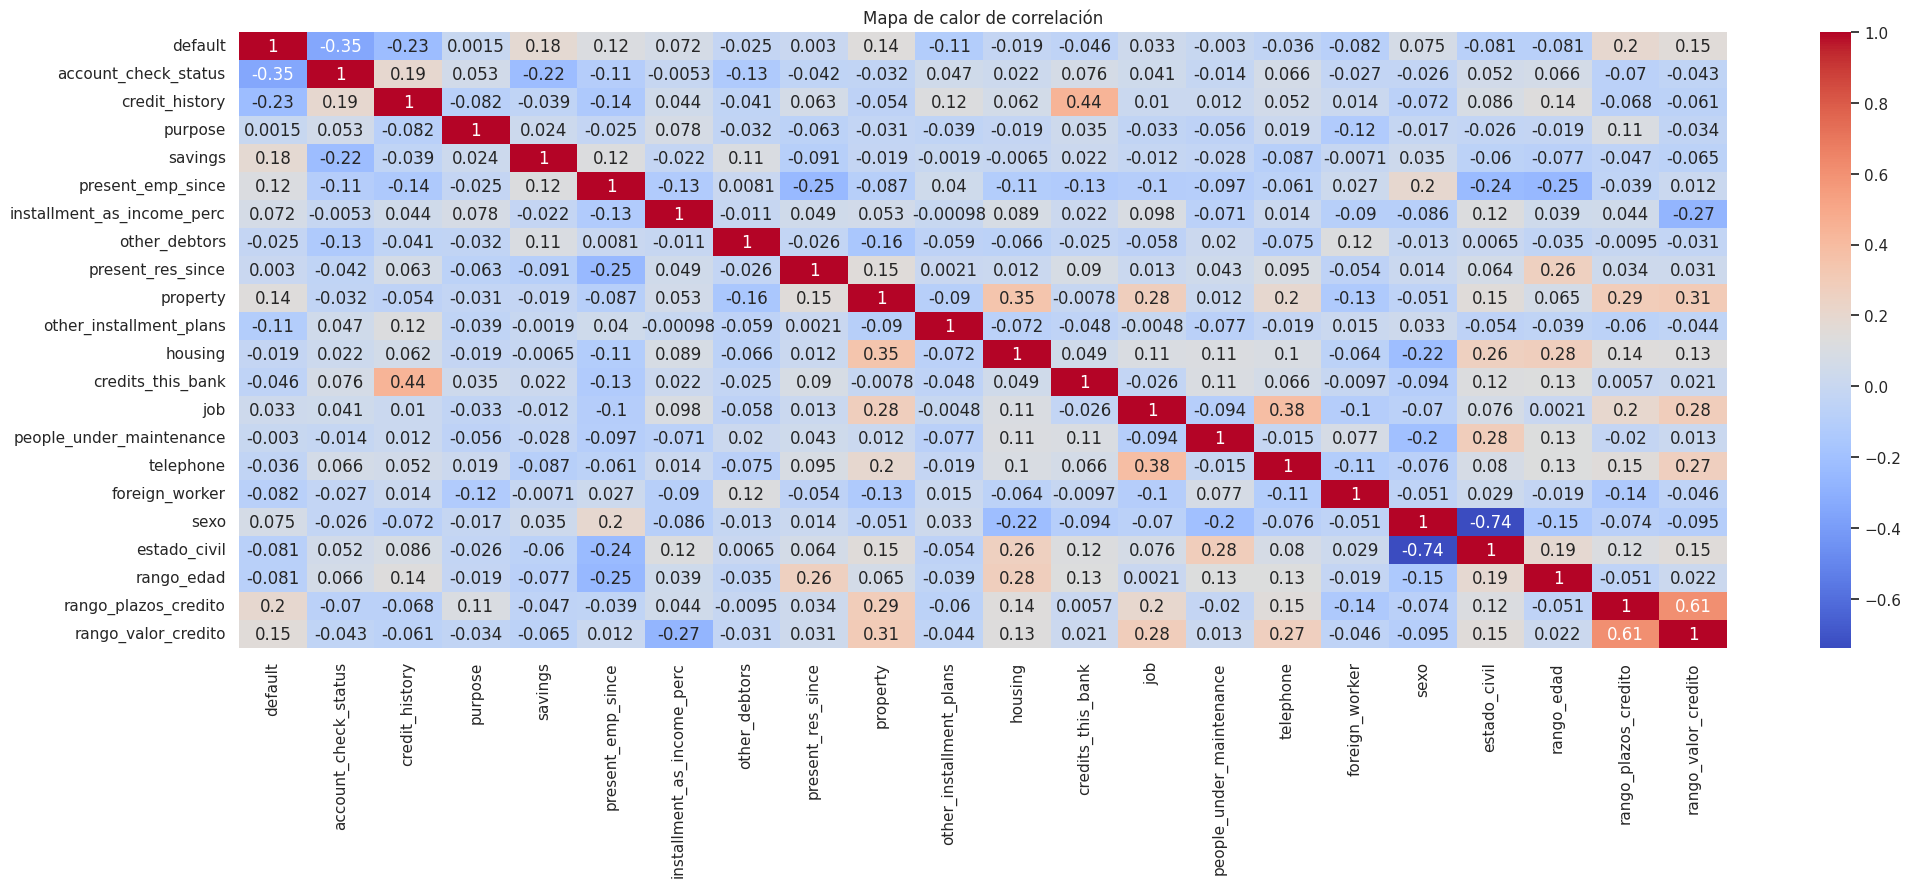

In [29]:
# crear mapa de calor de correlación:
# annot=True se utiliza para mostrar los valores de correlación en
# cada celda del mapa de calor, y cmap='coolwarm' se utiliza para
# elegir una paleta de colores para el mapa de calor.

plt.figure(figsize=(24, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()


CLASE 02 - CONSTRUCCIÓN, EVALUACIÓN Y SELECCIÓN DEL MEJOR MODELO

#**4. Construcción de Modelos**


---

In [30]:
# prompt: importar las siguientes bibliotecas: train_test_split, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# ayuda a dividir bases de datos en datos de entrenamiento y datos de prueba
from sklearn.model_selection import train_test_split
# diferentes modelos de machine learning de clasificacion
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# metricas de evaluacion para evaluar cual de los 4 modelos da mejores resultados
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [31]:
# prompt: ejemplo de modelo de machine learning de clasificacion

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 1. Preprocesar los datos
# ... (your preprocessing code here)

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X = df_banco.drop('default', axis=1)
y = df_banco['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# 4. Evaluar el modelo
predicciones = modelo.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)
print(f'Accuracy: {accuracy}')

# 5. Mejorar el modelo (opcional)
# ... (your model improvement code here)
# Crear y mostrar la matriz de confusión
cm = confusion_matrix(y_test, predicciones)
print(cm)

Accuracy: 0.772
[[160  18]
 [ 39  33]]


In [32]:
#@title
def crea_modelos(df):
  global df_banco, resultados
  y = df['default']
  x = df.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)

      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results

In [33]:
crea_modelos(df_banco)
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799771788741578


Árbol de Decisión
0.7066666666666667
0.4864864864864865
0.4186046511627907
0.45
0.6205172788524234


Random Forest
0.7933333333333333
0.75
0.4186046511627907
0.5373134328358209
0.7880895457509237


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




#**5. Evaluación y Selección del Modelo**


---

In [34]:
#@title
def visualiza_resultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

  # @title Texto de título predeterminado
  from IPython.display import HTML, display

  # Texto que quieres centrar
  texto = "¿Cuál de estos modelos seleccionarías y por qué?"

  # Crear una celda HTML con el texto centrado
  display(HTML(f"<center><h2>{texto}</h2></center>"))

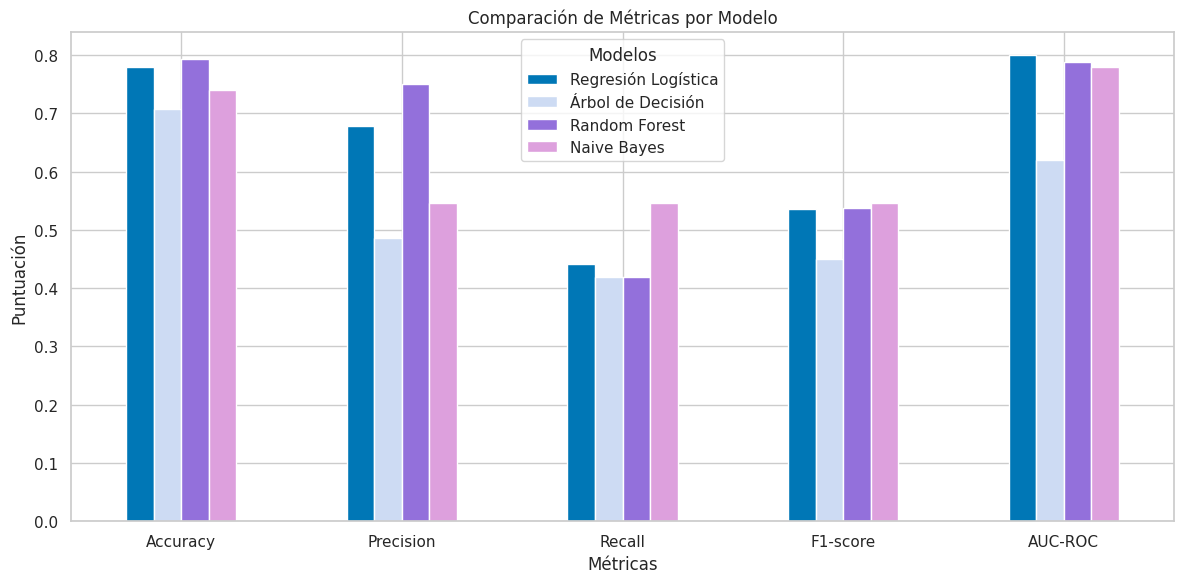

In [35]:
visualiza_resultados()

#**6. Desafíos**


---

Desafíos:
*   Evaluar la Matrix de Confusión
*   Balancear la variable target (tecnicas de oversampling)
*   Seleccionar sólo algunas variable y reevaluar


Una matriz de confusión es una herramienta que se utiliza en el análisis de clasificación en data science para evaluar el rendimiento de un modelo de clasificación.

-Verdaderos Positivos (TP): Casos en los que el modelo predice correctamente la clase positiva.

-Verdaderos Negativos (TN): Casos en los que el modelo predice correctamente la clase negativa.

-Falsos Positivos (FP): Casos en los que el modelo predice incorrectamente la clase positiva cuando la clase real es negativa (error tipo I).

-Falsos Negativos (FN): Casos en los que el modelo predice incorrectamente la clase negativa cuando la clase real es positiva (error tipo II).

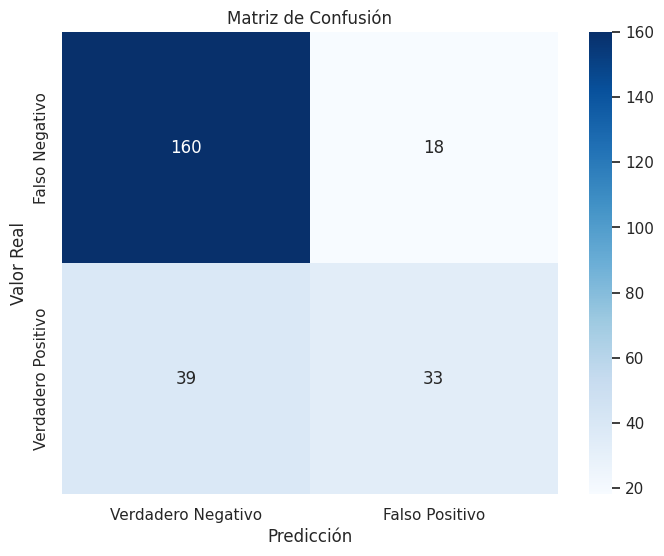

In [36]:
# matriz de confusión sin valancear default
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

cm = confusion_matrix(y_test, predicciones)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear el heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Verdadero Negativo', 'Falso Positivo'],
            yticklabels=['Falso Negativo', 'Verdadero Positivo'])

# Añadir etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar la gráfica
plt.show()

Balancear la variable target (tecnicas de oversampling)

Al balancear default el modelo de random forest se fortalese en todas sus evaluaciones, siendo el mejor modelo en las prediccioes

In [37]:
df_banco['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

In [38]:
# valancear nuestro target (column default)
from imblearn.over_sampling import SMOTE
import pandas as pd

# y la columna objetivo desbalanceada se llama 'target'

# Separar las características (X) y la columna objetivo (y)
X = df_banco.drop('default', axis=1)
y = df_banco['default']

# Aplicar SMOTE para balancear la columna objetivo
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo DataFrame con las características balanceadas y la columna objetivo
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='default')], axis=1)

# Verificar el balance de clases después de aplicar SMOTE
df_resampled['default'].value_counts()


0    700
1    700
Name: default, dtype: int64

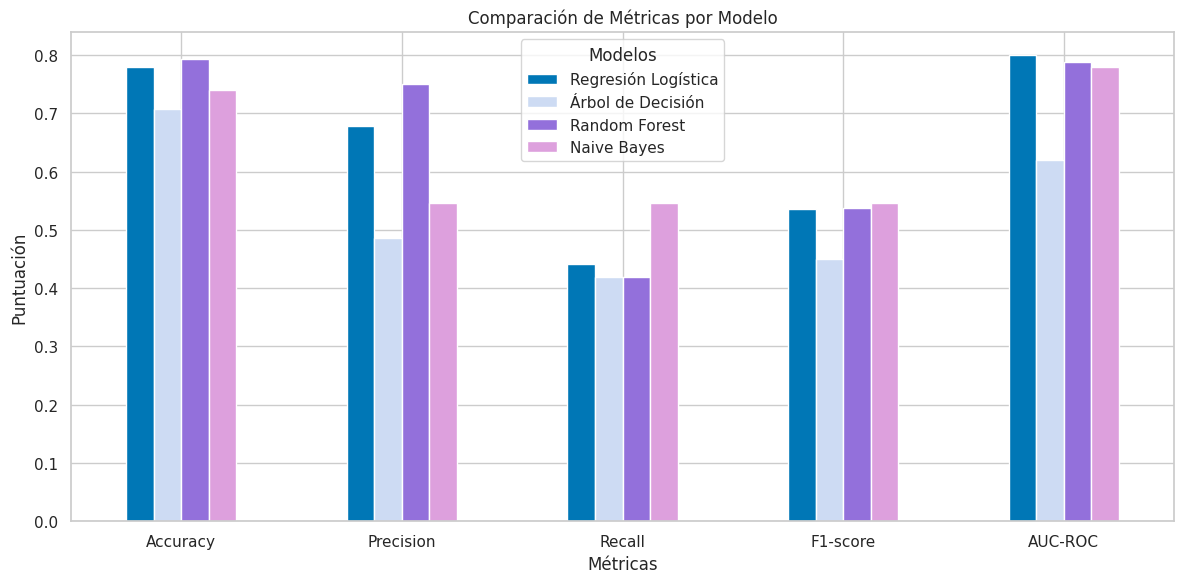

In [39]:
visualiza_resultados()

realizando entrenamiento con modelo de LogisticRegression para comparar matrices de confucion,entre modelo LogisticRegression con la variable target (default) desequilibrada y modelo LogisticRegression con la variable target (default) balanceada.

In [40]:
# prompt: ejemplo de modelo de machine learning de clasificacion

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 1. Preprocesar los datos
# ... (your preprocessing code here)

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X = df_resampled.drop('default', axis=1)
y = df_resampled['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# 4. Evaluar el modelo
predicciones = modelo.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)
print(f'Accuracy: {accuracy}')

# 5. Mejorar el modelo (opcional)
# ... (your model improvement code here)
# Crear y mostrar la matriz de confusión
cm = confusion_matrix(y_test, predicciones)
print(cm)

Accuracy: 0.7685714285714286
[[133  50]
 [ 31 136]]


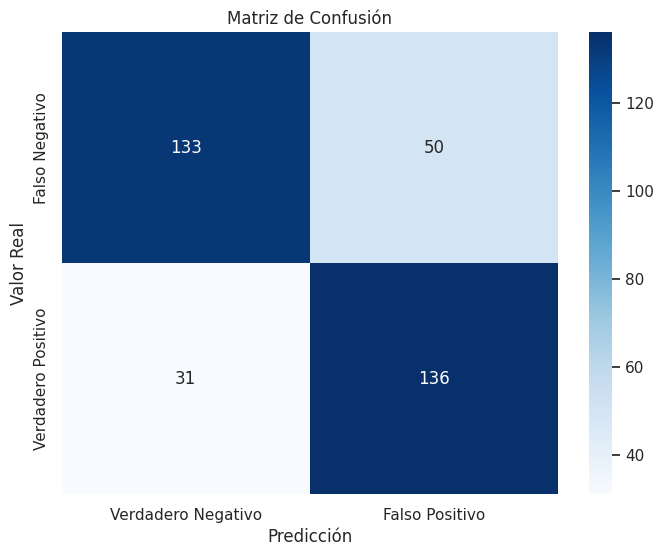

In [41]:
# matriz de confusión sin valancear default
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

cm = confusion_matrix(y_test, predicciones)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear el heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Verdadero Negativo', 'Falso Positivo'],
            yticklabels=['Falso Negativo', 'Verdadero Positivo'])

# Añadir etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar la gráfica
plt.show()

los valores de prediccion muestran que al balancear la variable default mejoran los aciertos y se reducen los aciertos erroneos  

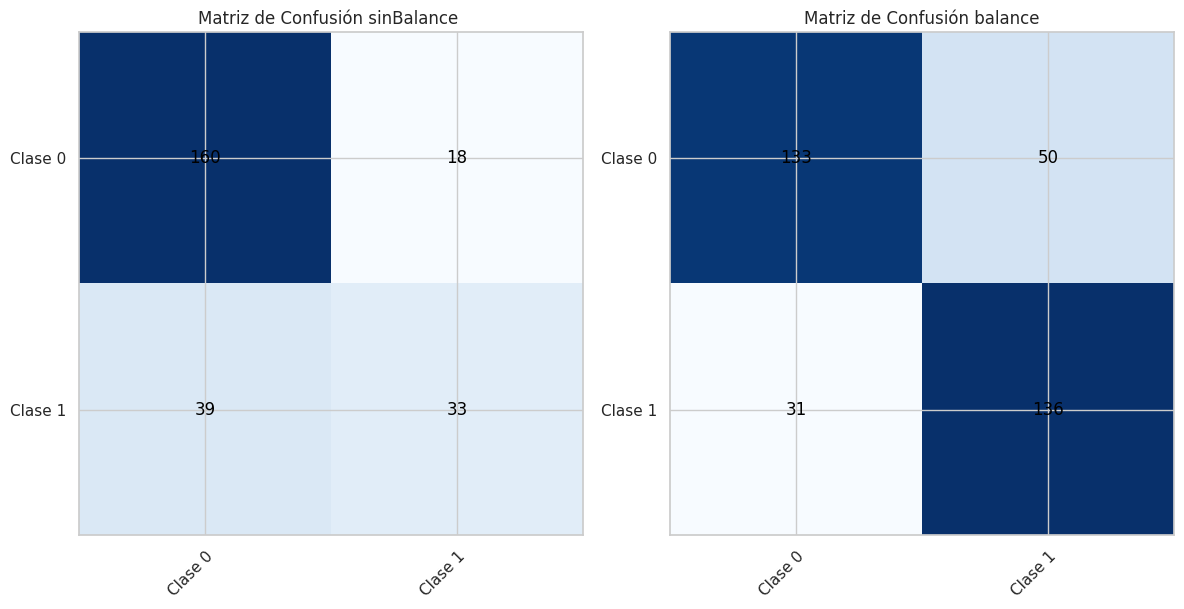

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Matrices de confusión
confusion_matrix_sinBalance = np.array([[160, 18],[ 39, 33]])
confusion_matrix_balance = np.array([[133, 50],[ 31, 136]])

# Etiquetas de las clases
classes = ['Clase 0', 'Clase 1']

# Crear figura y ejes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Graficar primera matriz de confusión
axs[0].imshow(confusion_matrix_sinBalance, interpolation='nearest', cmap=plt.cm.Blues)
axs[0].set_title('Matriz de Confusión sinBalance ')
axs[0].set_xticks(np.arange(len(classes)))
axs[0].set_yticks(np.arange(len(classes)))
axs[0].set_xticklabels(classes)
axs[0].set_yticklabels(classes)
plt.setp(axs[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(classes)):
    for j in range(len(classes)):
        axs[0].text(j, i, confusion_matrix_sinBalance[i, j], ha="center", va="center", color="black")

# Graficar segunda matriz de confusión
axs[1].imshow(confusion_matrix_balance, interpolation='nearest', cmap=plt.cm.Blues)
axs[1].set_title('Matriz de Confusión balance')
axs[1].set_xticks(np.arange(len(classes)))
axs[1].set_yticks(np.arange(len(classes)))
axs[1].set_xticklabels(classes)
axs[1].set_yticklabels(classes)
plt.setp(axs[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(classes)):
    for j in range(len(classes)):
        axs[1].text(j, i, confusion_matrix_balance[i, j], ha="center", va="center", color="black")

# Ajustar diseño de los gráficos
plt.tight_layout()

# Mostrar gráfico
plt.show()

entrenar modelo solo con algunas columnas del dataframe y con RandomForestClassifier

In [43]:
# Seleccionar las columnas deseadas
campos_no_necesarios = [
    'default',
    'purpose',
    'savings',
    'installment_as_income_perc',
    'other_debtors',
    'present_res_since',
    'property',
    'other_installment_plans',
    'housing',
    'job',
    'telephone',
    'foreign_worker'
]
X = df_banco.drop(columns=campos_no_necesarios)

# Seleccionar la columna objetivo
y = df_banco['default']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Entrenar un modelo (por ejemplo, Regresión Logística)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo, por ejemplo, con accuracy
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.752


#**7. Conclucion**


---

Después de evaluar los modelos con diferentes métricas y ajustar nuestros datos, he llegado a la conclusión de que el mejor modelo para clasificar nuestros datos es el RandomForestClassifier. Esto lo decidí después de que el modelo sobresaliera sobre los otros en las siguientes pruebas.
*   Accuracy
*   Precision
*   Recall
*   F1-score
*   AUC-ROC

mostrando asi ser el que mejor que se adapta para clasificar nuestros datos y definir quien sera un buen cliente y el banco podra realizarle creditos.



